In [1]:
import os
import tensorflow as tf
import glob
import pathlib
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

from tensorflow.keras.layers import Dense,Conv2D,Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

from tensorflow.keras import layers, models

In [2]:
train="D:\\GitHub\\Bird-Classifier\\data\\train"
test="D:\\GitHub\\Bird-Classifier\\data\\test"
valid="D:\\GitHub\\Bird-Classifier\\data\\valid"

In [3]:
def process(data):
    path=pathlib.Path(data)#converting the string to path
    filepaths=list(path.glob(r"*/*.jpg"))#Going through all the subpaths 
    labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))#Separating the label from filepath and storing it
    df1=pd.Series(filepaths,name='filepaths').astype(str)
    df2=pd.Series(labels,name='labels')
    df=pd.concat([df1,df2],axis=1)#Making the dataframe
    return df

process(test)

,filepaths,labels
0,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
1,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
2,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
3,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
4,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
...,...,...
1620,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD
1621,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD
1622,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD
1623,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD


In [4]:
df_train=process(train)
df_test=process(test)
df_valid=process(valid)

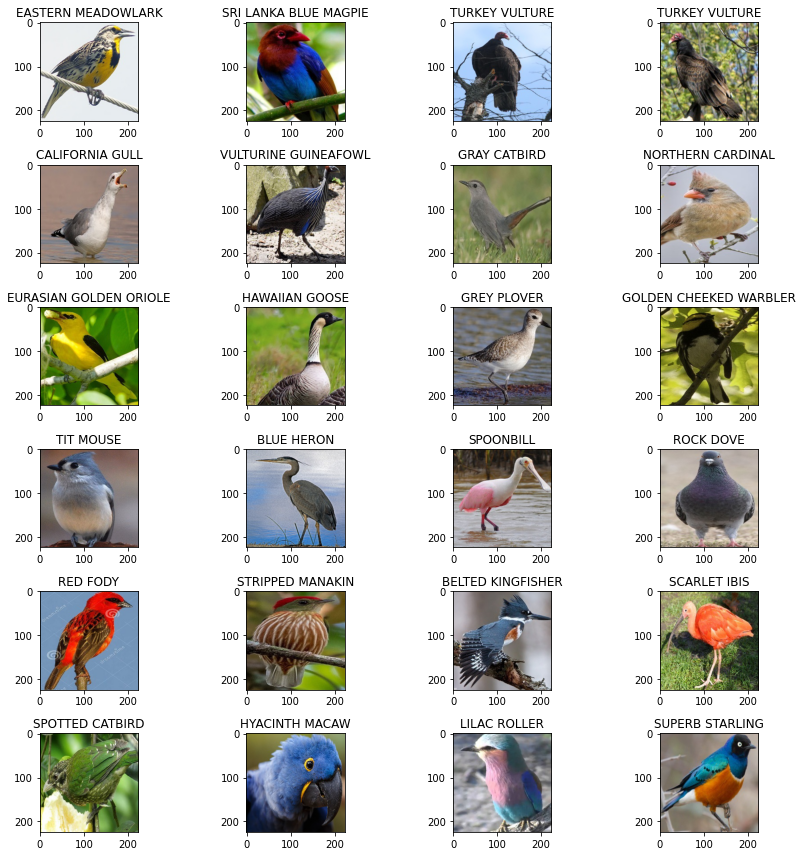

In [5]:
df_train=df_train.sample(frac=1).reset_index(drop=True)#Shuffling the dataframe so we can get random bird pictures
fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(12,12))

for i,ax in enumerate(axes.flat): 
    x=plt.imread(df_train['filepaths'][i])#reading the image
    ax.imshow(x)
    ax.set_title(df_train['labels'][i])
plt.tight_layout()    
plt.show() 

In [6]:
train_generator=ImageDataGenerator( preprocessing_function=preprocess_input)
test_generator=ImageDataGenerator( preprocessing_function=preprocess_input)
valid_generator=ImageDataGenerator( preprocessing_function=preprocess_input)

In [7]:
train_image=train_generator.flow_from_dataframe(dataframe=df_train,
                                                x_col='filepaths',
                                                y_col='labels',
                                                target_size=(224,224),
                                                batch_size=64,
                                                subset='training',
                                                random_seed=42)

test_image = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='filepaths',
    y_col='labels',
    target_size=(224,224),
    batch_size=8
)

valid_image = test_generator.flow_from_dataframe(
    dataframe=df_valid,
    x_col='filepaths',
    y_col='labels',
    subset='training',
    target_size=(224,224),
    batch_size=32)

Found 47332 validated image filenames belonging to 325 classes.
Found 1625 validated image filenames belonging to 325 classes.
Found 1625 validated image filenames belonging to 325 classes.


In [8]:
classes = train_image.classes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


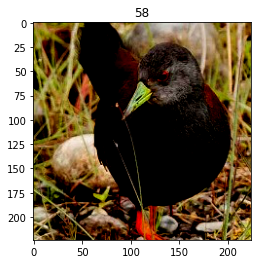

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


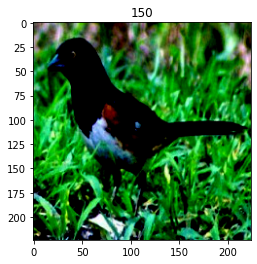

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


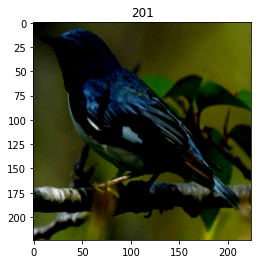

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


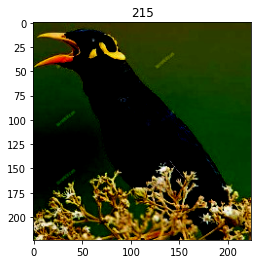

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


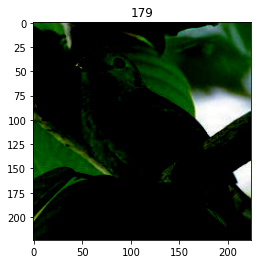

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


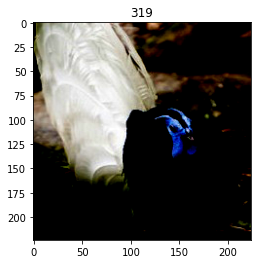

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


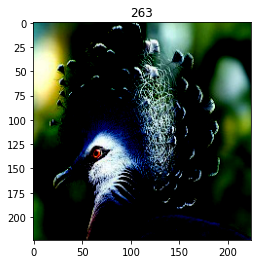

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


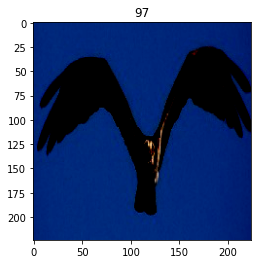

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


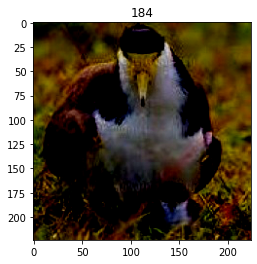

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


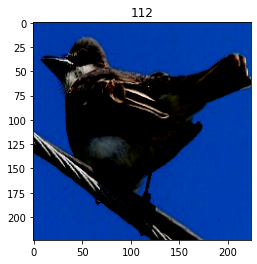

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


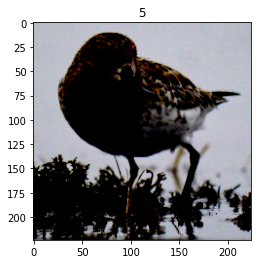

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


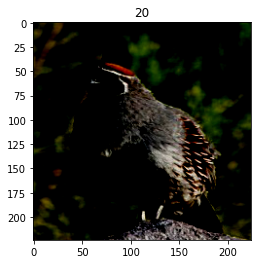

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


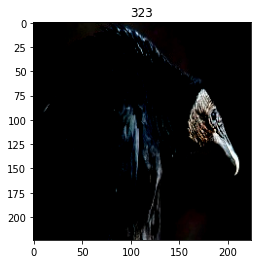

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


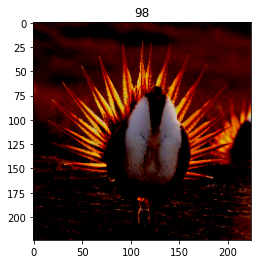

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


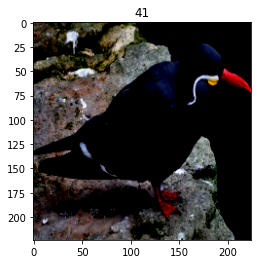

In [9]:
for i in range(15):
   img, label = train_image[i]
   label = np.argmax(label, axis=-1)
   print(img.shape) 
   plt.title(classes[label[1]])
   plt.imshow(img[1])
   plt.show()

In [10]:
vgg_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

print(vgg_model.output)

vgg_model.trainable = False
layer0 = tf.keras.layers.Flatten()(vgg_model.output)
layer1 = tf.keras.layers.Dense(4096, activation='relu')(layer0)
layer2 = tf.keras.layers.Dense(4096, activation='relu')(layer1)
out_layer = tf.keras.layers.Dense(325, activation='softmax')(layer2)
vgg_model = tf.keras.Model(vgg_model.input, out_layer)
vgg_model.summary()

small_guy = models.Sequential()

small_guy.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
small_guy.add(layers.MaxPooling2D((2, 2)))
small_guy.add(layers.Conv2D(64, (3, 3), activation='relu'))
small_guy.add(layers.MaxPooling2D((2, 2)))
small_guy.add(layers.Conv2D(64, (3, 3), activation='relu'))
small_guy.add(layers.Flatten())
small_guy.add(layers.Dense(512, activation = 'relu'))
small_guy.add(layers.Dense(325, activation = 'softmax'))

print(small_guy.summary())

KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (Non

In [11]:
from keras.metrics import Precision, Recall

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
small_guy.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy', Precision(), Recall()])
callbacks = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [12]:
from tensorflow.python.keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [13]:
with tf.device('/device:GPU:0'):

    history = small_guy.fit(
        train_image, 
        epochs=15,
        verbose=1,
        validation_data = valid_image,
        callbacks=callbacks, batch_size = 64)

Epoch 1/15
740/740 [==============================] - 394s 522ms/step - loss: 4.5802 - accuracy: 0.1333 - precision: 0.6888 - recall: 0.0265 - val_loss: 3.2986 - val_accuracy: 0.3058 - val_precision: 0.7375 - val_recall: 0.1089
Epoch 2/15
740/740 [==============================] - 230s 311ms/step - loss: 2.7855 - accuracy: 0.4015 - precision: 0.8083 - recall: 0.1911 - val_loss: 2.5207 - val_accuracy: 0.4486 - val_precision: 0.7873 - val_recall: 0.2369
Epoch 3/15
740/740 [==============================] - 337s 455ms/step - loss: 1.7058 - accuracy: 0.6109 - precision: 0.8845 - recall: 0.4262 - val_loss: 2.3346 - val_accuracy: 0.4806 - val_precision: 0.7444 - val_recall: 0.3298
Epoch 4/15
740/740 [==============================] - 160s 216ms/step - loss: 0.8005 - accuracy: 0.8130 - precision: 0.9421 - recall: 0.7006 - val_loss: 2.5233 - val_accuracy: 0.4597 - val_precision: 0.6693 - val_recall: 0.3698
Epoch 5/15
740/740 [==============================] - 162s 219ms/step - loss: 0.2391 - a

In [17]:
small_guy.save('D:\\GitHub\\Bird-Classifier\\models\\small_guy', save_format='h5')

In [15]:
del vgg_model

ret_model = tf.keras.models.load_model('D:\\GitHub\\Bird-Classifier\\models\\inception')

ResourceExhaustedError: failed to allocate memory [Op:Mul]

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BANDED PITA', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIRD', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK BAZA', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLONDE CRESTED WOODPECKER', 'BLUE COAU', 'BLUE GROUSE', 'BLUE HERON', 'BLUE THROATED TOUCANET', 'BOBOLINK', 'BO

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


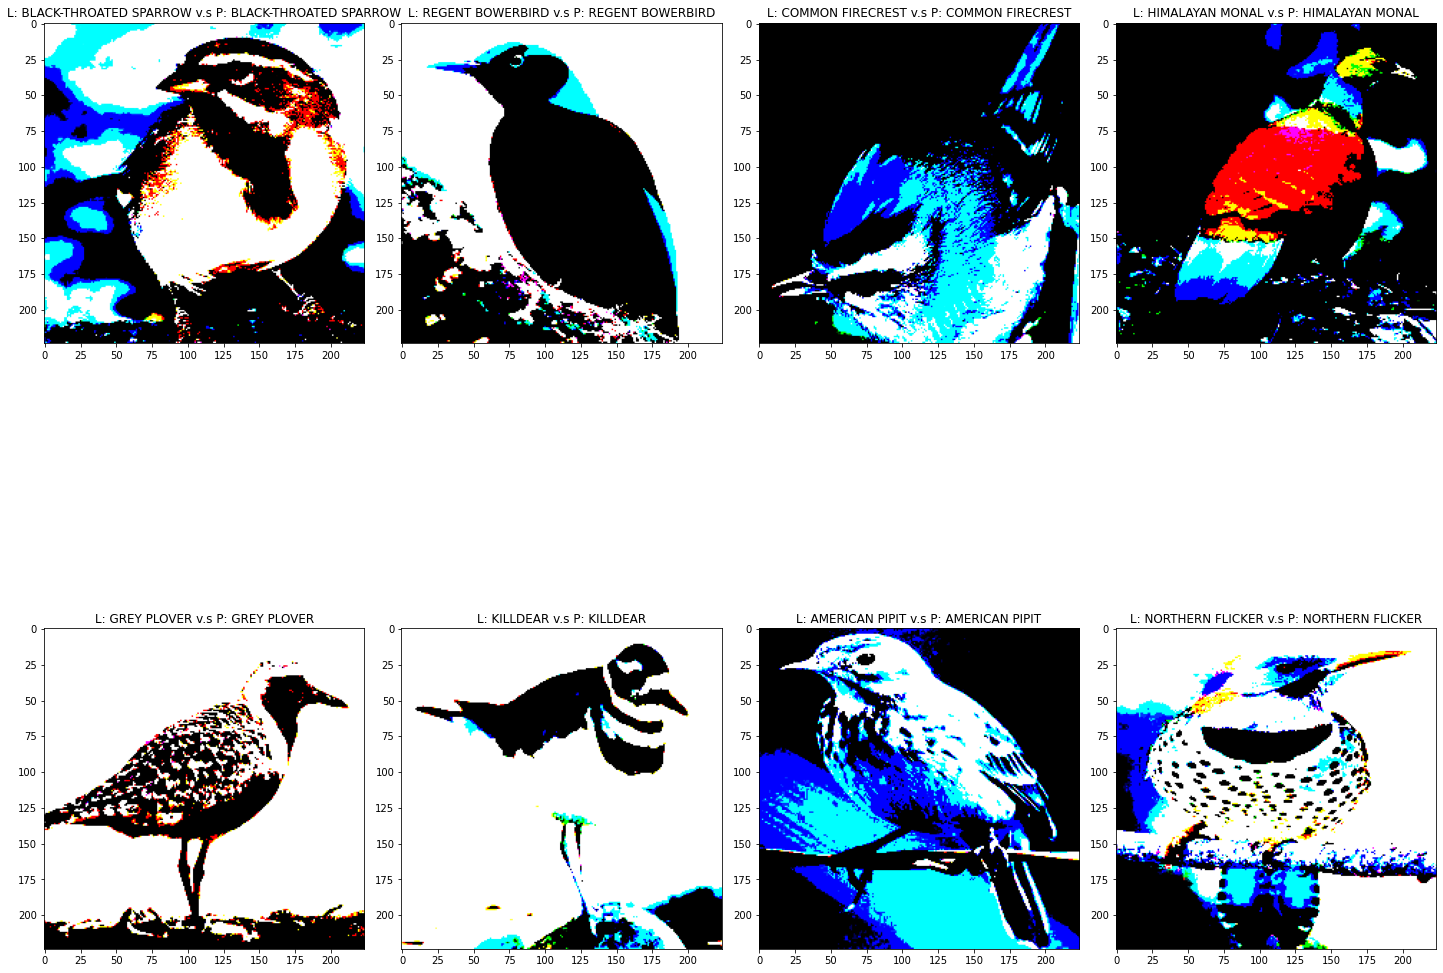

In [ ]:
ref = list(train_image.class_indices.keys())

print(ref)

images, labels = test_image.next()


preds = vgg_model.predict(images, batch_size = 8)
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,20))
dic={i:ax for i,ax in enumerate(axes.flat)}
for i in range(0,8):
    label = np.argmax(labels[i])
    pred = np.argmax(preds[i])
    image = images[i]
    dic[i].set_title("L: " + ref[label] + " v.s " + "P: " + ref[pred])
    dic[i].imshow(image)
plt.tight_layout()    
plt.show() 